## 1. Load Data

In [2]:
import numpy as np
import pandas as pd

In [3]:
pd.set_option("display.max_columns", None)

data_path = "../data/raw/diamonds.csv"
df = pd.read_csv(data_path, index_col=0)

In [4]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## 2. EDA

In [7]:
import math
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns

class eda_plot:
    def __init__(self, 
                 data: pd.DataFrame, 
                 numerical_features: List, 
                 categorical_features: List,
                 target_feature: str,
                 n_col: int = 3):
        self.df = data
        self.numerical_features = numerical_features
        self.categorical_features = categorical_features
        self.target_feature = target_feature
        self.n_col = n_col

        self.numerical_col = self.numerical_features + [self.target_feature]

    def plot_distribution_histogram(self):
        n_row = math.ceil(self.df.shape[1] / self.n_col)
        plt.figure(figsize=(5*self.n_col, 4*n_row))

        for index, feature in enumerate(self.numerical_features):
            plt.subplot(n_row, self.n_col, index + 1)
            mean_val = self.df[feature].mean()
            median_val = self.df[feature].median()

            sns.histplot(data=self.df, x=feature, color="skyblue", stat="density", label="Histogram")
            sns.kdeplot(data=self.df, x=feature, color="blue", linewidth="1.5", label="KDE (Density)")
            plt.axvline(mean_val, linestyle="--", color="green", label=f"Mean: {mean_val:.0f}")
            plt.axvline(median_val, linestyle="--", color="red", label=f"Median: {median_val:.0f}")

            plt.title(f"Distribution of {feature}", fontsize=14)
            plt.legend(loc="upper right")
            plt.xlabel(xlabel=f"{feature}")
        
        plt.tight_layout()
        plt.show()

    
    def plot_numerical_scattter_regline(self):
        n_row = math.ceil(len(self.numerical_features) / self.n_col)

        plt.figure(figsize=(5 * self.n_col, 4 * n_row))

        max_y_limit = self.df[self.target_feature].max() * 1.05

        for index, feature in enumerate(self.numerical_features):
            plt.subplot(n_row, self.n_col, index + 1)
            sns.scatterplot(data=self.df, x=feature, y=self.target_feature, color="blue", alpha= 0.2, edgecolor=None, label="Data point")
            sns.regplot(data=self.df, x=feature, y=self.target_feature, scatter=False, color="red", line_kws={'linestyle': '--'}, label="Linear fit")

            plt.ylim(0, max_y_limit)
            plt.title(f"Linear Regression: {self.target_feature.capitalize()} vs {feature}")
            plt.legend(loc="upper right")

        plt.tight_layout()
        plt.show()

    def plot_categorical_boxplots(self): 
        n_row = math.ceil(len(self.categorical_features) / self.n_col)
        plt.figure(figsize=(5 * self.n_col, 4* n_row))

        max_y_limit = self.df[self.target_feature].max() * 1.05

        for index, feature in enumerate(self.categorical_features):
            plt.subplot(n_row, self.n_col, index + 1)
            sns.boxplot(data=self.df, x=feature, y=self.target_feature, hue=feature, palette="plasma")

            plt.ylim(0, max_y_limit)
            plt.title(f"Distribution of {self.target_feature.capitalize()} by {feature}", fontsize=14)

        plt.tight_layout()
        plt.show()
    
    def plot_correlation_matrix(self):
        correlation_matrix = self.df.corr(numeric_only=True)
        sns.heatmap(data=correlation_matrix, cmap="coolwarm", annot=True, vmin=-1, vmax=1, fmt=".2f")
        plt.title("Correlation Matrix")
        plt.tight_layout()
        plt.show()

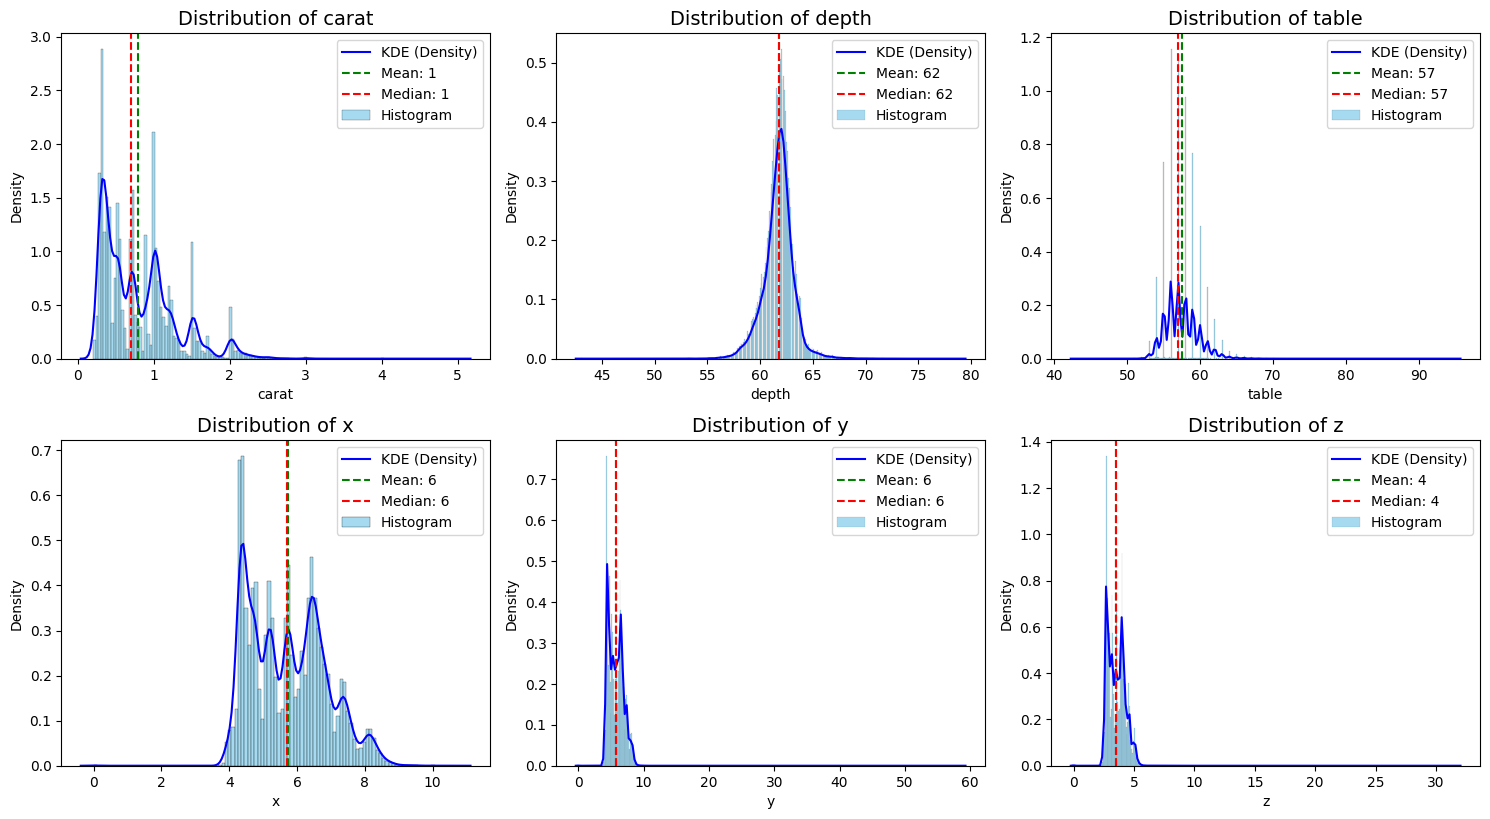

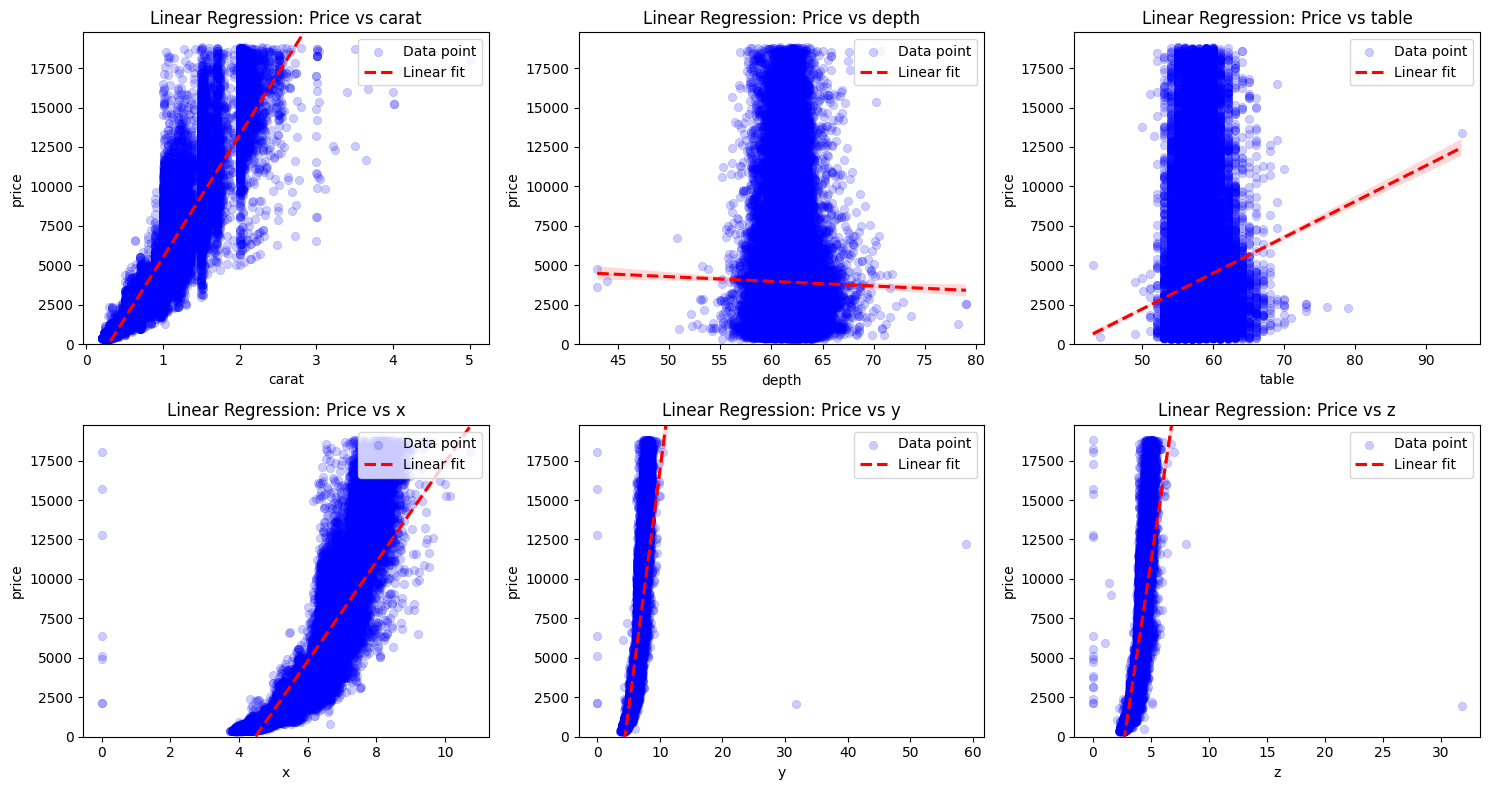

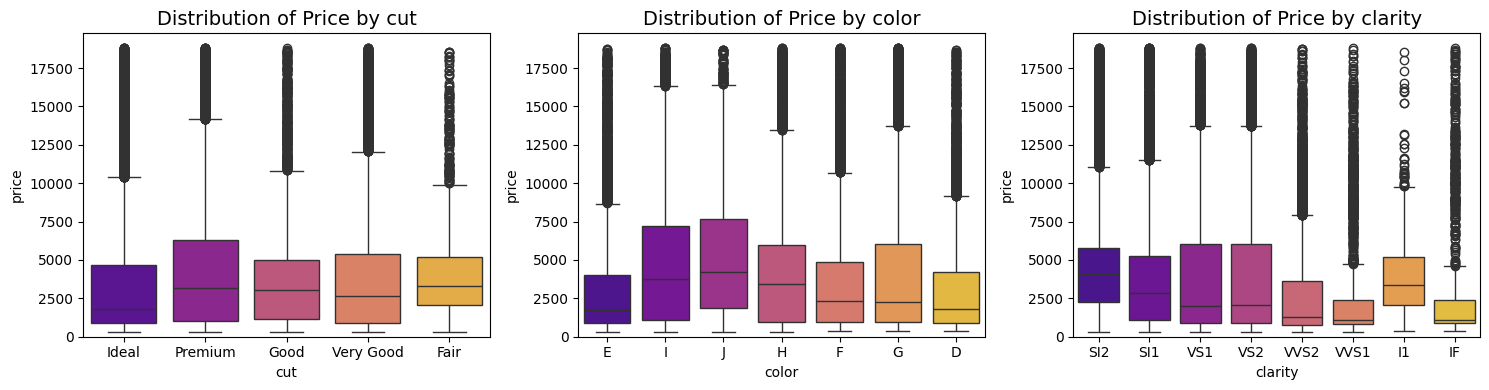

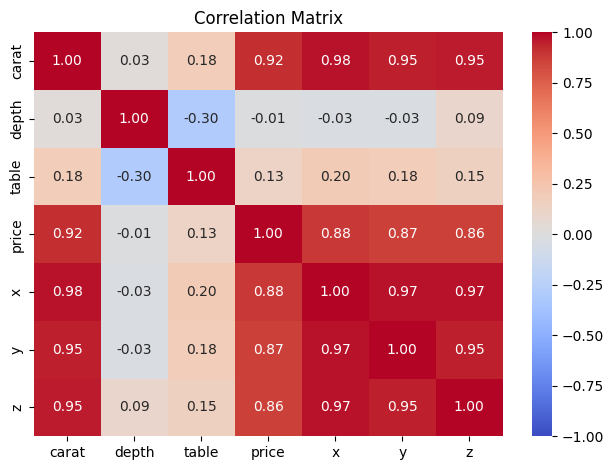

In [8]:
numerical_features = ["carat", "depth", "table", "x", "y", "z"]
categorical_features = ["cut", "color", "clarity"]
target_feature = "price"
plotter = eda_plot(df, numerical_features, categorical_features, target_feature)

plotter.plot_distribution_histogram()
plotter.plot_numerical_scattter_regline()
plotter.plot_categorical_boxplots()
plotter.plot_correlation_matrix()

## 3. Data Cleaning

In [9]:
invalid_dimension = df[(df["x"] <= 0) | (df["y"] <= 0) | (df["z"] <= 0)]
invalid_dimension.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [11]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
# Remove outliers
df = df[(df["x"] > 0) & (df["y"] > 0) & (df["z"] > 0)]
df = df[(df["depth"]<75)&(df["depth"]>50)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["y"]<30)]
df = df[(df["z"]<10)&(df["z"]>2)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53907 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53907 non-null  float64
 1   cut      53907 non-null  object 
 2   color    53907 non-null  object 
 3   clarity  53907 non-null  object 
 4   depth    53907 non-null  float64
 5   table    53907 non-null  float64
 6   price    53907 non-null  int64  
 7   x        53907 non-null  float64
 8   y        53907 non-null  float64
 9   z        53907 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [13]:
# Save to
df.to_csv("../data/processed/cleaned_dataset.csv", index=False)

## 4. Feature Engineering

In [14]:
df = pd.read_csv("../data/processed/cleaned_dataset.csv")

In [15]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
df["cut"].value_counts()

cut
Ideal        21543
Premium      13779
Very Good    12080
Good          4902
Fair          1603
Name: count, dtype: int64

In [17]:
cut_map = {
    "Fair": 1,
    "Good" : 2,
    "Very Good": 3,
    "Premium": 4,
    "Ideal": 5,
}

df["cut"] = df["cut"].map(cut_map)

In [18]:
df["color"].value_counts()

color
G    11282
E     9792
F     9536
H     8296
D     6774
I     5420
J     2807
Name: count, dtype: int64

In [19]:
color_map = {
    'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7
}

df["color"] = df["color"].map(color_map)

In [20]:
df["clarity"].value_counts()

clarity
SI1     13059
VS2     12250
SI2      9184
VS1      8167
VVS2     5066
VVS1     3654
IF       1790
I1        737
Name: count, dtype: int64

In [21]:
clarity_map = {
    'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 
    'VVS2': 6, 'VVS1': 7, 'IF': 8,
}

df["clarity"] = df["clarity"].map(clarity_map)

In [22]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [23]:
# Create new data from df for polynomial features
df_poly = df.copy()

In [24]:
# Dimension reduction for x, y, z (which have strong correlation)
df_poly["volume"] = df_poly["x"] * df_poly["y"] * df_poly["z"]

cols_to_check = ["price", "x", "y", "z", "volume"]
print(df_poly[cols_to_check].corr()["price"])

df_poly = df_poly.drop(columns=["x", "y", "z"])

price     1.000000
x         0.887212
y         0.888807
z         0.882634
volume    0.923642
Name: price, dtype: float64


In [25]:
df_poly.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,6,2,61.5,55.0,326,38.202030
1,0.21,4,6,3,59.8,61.0,326,34.505856
2,0.23,2,6,5,56.9,65.0,327,38.076885
3,0.29,4,2,4,62.4,58.0,334,46.724580
4,0.31,2,1,2,63.3,58.0,335,51.917250


In [26]:
df_poly["density"] = df_poly["carat"] / df_poly["volume"]
cols_to_check = ["price", "volume", "density", "carat"]
print(df_poly[cols_to_check].corr())
df_poly = df_poly.drop(columns=["volume"])

            price    volume   density     carat
price    1.000000  0.923642  0.179955  0.921590
volume   0.923642  1.000000  0.223686  0.999050
density  0.179955  0.223686  1.000000  0.261066
carat    0.921590  0.999050  0.261066  1.000000


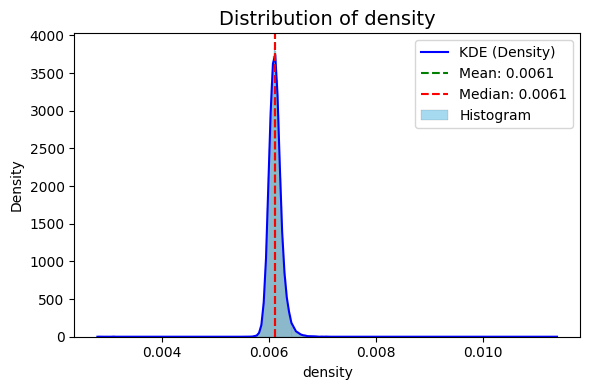

In [27]:
feature = "density"

plt.figure(figsize=(6, 4))
mean_val = df_poly[f"{feature}"].mean()
median_val = df_poly[f"{feature}"].median()

sns.histplot(data=df_poly, x=feature, color="skyblue", stat="density", label="Histogram")
sns.kdeplot(data=df_poly, x=feature, color="blue", linewidth="1.5", label="KDE (Density)")
plt.axvline(mean_val, linestyle="--", color="green", label=f"Mean: {mean_val:.4f}")
plt.axvline(median_val, linestyle="--", color="red", label=f"Median: {median_val:.4f}")

plt.title(f"Distribution of {feature}", fontsize=14)
plt.legend(loc="upper right")
plt.xlabel(xlabel=f"{feature}")

plt.tight_layout()
plt.show()

In [28]:
# Log transform for right skewed data
log_feature = ["price", "carat"]
df_poly[log_feature] = pd.DataFrame(np.log1p(df_poly[log_feature]))

In [29]:
df_poly.head(5)

,carat,cut,color,clarity,depth,table,price,density
0,0.207014,5,6,2,61.5,55.0,5.789960,0.006021
1,0.190620,4,6,3,59.8,61.0,5.789960,0.006086
2,0.207014,2,6,5,56.9,65.0,5.793014,0.006040
3,0.254642,4,2,4,62.4,58.0,5.814131,0.006207
4,0.270027,2,1,2,63.3,58.0,5.817111,0.005971


In [30]:
from typing import List

def add_squared_features(data: pd.DataFrame, features: List[str], degree: int = 2) -> pd.DataFrame:
    for feature in features:
        for i in range(2, degree + 1):
            data[f"{feature}^{i}"] = data[feature]**i
    
    return data

def add_interaction_features(data: pd.DataFrame, 
                             primary_feature: str, 
                             interaction_features: List[str],
                             degree: int = 2) -> pd.DataFrame:
    
    add_squared_features(data, [primary_feature], degree)

    for feature in interaction_features:
        add_squared_features(data, [feature], degree)
        data[f"{primary_feature}_x_{feature}"] = data[primary_feature] * data[feature]
        
        for i in range(2, degree + 1):
            data[f"{primary_feature}^{i}_x_{feature}"] = data[primary_feature]**i * data[feature]
            
    return data

In [31]:
interaction_features = ["cut", "color", "clarity","density"]
add_interaction_features(df_poly, "carat", interaction_features, 3)

,carat,cut,color,clarity,depth,table,price,density,carat^2,carat^3,cut^2,cut^3,carat_x_cut,carat^2_x_cut,carat^3_x_cut,color^2,color^3,carat_x_color,carat^2_x_color,carat^3_x_color,clarity^2,clarity^3,carat_x_clarity,carat^2_x_clarity,carat^3_x_clarity,density^2,density^3,carat_x_density,carat^2_x_density,carat^3_x_density
0,0.207014,5,6,2,61.5,55.0,5.789960,0.006021,0.042855,0.008872,25,125,1.035071,0.214274,0.044358,36,216,1.242085,0.257129,0.053229,4,8,0.414028,0.085710,0.017743,0.000036,2.182349e-07,0.001246,0.000258,0.000053
1,0.190620,4,6,3,59.8,61.0,5.789960,0.006086,0.036336,0.006926,16,64,0.762481,0.145344,0.027706,36,216,1.143722,0.218017,0.041558,9,27,0.571861,0.109008,0.020779,0.000037,2.254133e-07,0.001160,0.000221,0.000042
2,0.207014,2,6,5,56.9,65.0,5.793014,0.006040,0.042855,0.008872,4,8,0.414028,0.085710,0.017743,36,216,1.242085,0.257129,0.053229,25,125,1.035071,0.214274,0.044358,0.000036,2.203937e-07,0.001250,0.000259,0.000054
3,0.254642,4,2,4,62.4,58.0,5.814131,0.006207,0.064843,0.016512,16,64,1.018569,0.259371,0.066047,4,8,0.509284,0.129685,0.033023,16,64,1.018569,0.259371,0.066047,0.000039,2.390880e-07,0.001580,0.000402,0.000102
4,0.270027,2,1,2,63.3,58.0,5.817111,0.005971,0.072915,0.019689,4,8,0.540054,0.145829,0.039378,1,1,0.270027,0.072915,0.019689,4,8,0.540054,0.145829,0.039378,0.000036,2.128874e-07,0.001612,0.000435,0.000118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53902,0.542324,5,7,3,60.8,57.0,7.922261,0.006211,0.294116,0.159506,25,125,2.711621,1.470578,0.797530,49,343,3.796270,2.058809,1.116542,9,27,1.626973,0.882347,0.478518,0.000039,2.396196e-07,0.003368,0.001827,0.000991
53903,0.542324,2,7,3,63.1,55.0,7.922261,0.006096,0.294116,0.159506,4,8,1.084649,0.588231,0.319012,49,343,3.796270,2.058809,1.116542,9,27,1.626973,0.882347,0.478518,0.000037,2.265351e-07,0.003306,0.001793,0.000972
53904,0.530628,3,7,3,62.8,60.0,7.922261,0.006116,0.281566,0.149407,9,27,1.591885,0.844699,0.448221,49,343,3.714398,1.970964,1.045849,9,27,1.591885,0.844699,0.448221,0.000037,2.287967e-07,0.003245,0.001722,0.000914
53905,0.620576,4,3,2,61.0,58.0,7.922261,0.006109,0.385115,0.238993,16,64,2.482306,1.540461,0.955974,9,27,1.861729,1.155346,0.716980,4,8,1.241153,0.770230,0.477987,0.000037,2.280347e-07,0.003791,0.002353,0.001460


## 5. Data Preprocessing

In [32]:
# Get X (features), y (label)
y = df_poly["price"]
X = df_poly.drop(columns="price")

y.info()
X.info()

<class 'pandas.core.series.Series'>
RangeIndex: 53907 entries, 0 to 53906
Series name: price
Non-Null Count  Dtype  
--------------  -----  
53907 non-null  float64
dtypes: float64(1)
memory usage: 421.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53907 entries, 0 to 53906
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   carat              53907 non-null  float64
 1   cut                53907 non-null  int64  
 2   color              53907 non-null  int64  
 3   clarity            53907 non-null  int64  
 4   depth              53907 non-null  float64
 5   table              53907 non-null  float64
 6   density            53907 non-null  float64
 7   carat^2            53907 non-null  float64
 8   carat^3            53907 non-null  float64
 9   cut^2              53907 non-null  int64  
 10  cut^3              53907 non-null  int64  
 11  carat_x_cut        53907 non-null  float64
 12  carat^2

In [33]:
X.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'density',
       'carat^2', 'carat^3', 'cut^2', 'cut^3', 'carat_x_cut', 'carat^2_x_cut',
       'carat^3_x_cut', 'color^2', 'color^3', 'carat_x_color',
       'carat^2_x_color', 'carat^3_x_color', 'clarity^2', 'clarity^3',
       'carat_x_clarity', 'carat^2_x_clarity', 'carat^3_x_clarity',
       'density^2', 'density^3', 'carat_x_density', 'carat^2_x_density',
       'carat^3_x_density'],
      dtype='object')

In [34]:
# Convert to numpy array
y_array = y.values
X_array= X.values

In [35]:
def split_data(X: np.ndarray,
               y: np.ndarray,
               test_ratio: float = 0.2,
               seed: int = 42) -> tuple:
    
    data_size = X.shape[0]
    train_size = int(data_size * ( 1 - test_ratio))

    # Create a randomized index list
    np.random.seed(seed=seed)
    indices = np.random.permutation(data_size)
    
    # Get index for train/test 
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]

    # Split data by randomized index
    X_train, X_test = X[train_indices], X[test_indices] 
    y_train, y_test = y[train_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test

In [36]:
# Split dataset to Train/Test (Test size = 0.2)
X_train, X_test, y_train, y_test = split_data(X_array, y_array)

# Split Train dataset to Train/Valid (Valid size = 0.15)
X_train, X_valid, y_train, y_valid = split_data(X_train, y_train)

In [37]:
import numpy as np

class RobustScaler:
    def __init__(self):
        self.median = None
        self.iqr = None
    
    def fit(self, data):
        self.median = np.median(data, axis=0)
        q75, q25 = np.percentile(data, [75, 25], axis=0)
        self.iqr = q75 - q25

        self.iqr = np.where(self.iqr == 0, 1, self.iqr) 

    def transform(self, data):
        if self.median is None or self.iqr is None:
            raise Exception(".fit() must be called before .transform()!")
        
        return (data - self.median) / self.iqr


    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

In [38]:
# Robust Scaling X_array
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [39]:
def add_bias(X: np.ndarray) -> np.ndarray:
    X_bias = np.column_stack((np.ones(X.shape[0]), X))
    return X_bias

In [40]:
# Add Bias
X_train = add_bias(X_train_scaled)

## 6. Modeling

In [41]:
import numpy as np
import matplotlib.pyplot as plt

class PolynomialRidge:
    def __init__(self, X, y, epochs, batch_size, learning_rate, alpha):
        self.X = X
        self.y = y
        self.epochs = epochs
        self.batch_size = batch_size
        self.lr = learning_rate
        self.alpha = alpha
        self.data_size = X.shape[0]

        self.theta = np.random.randn(X.shape[1])
        self.loss = []

    def predict(self, X: np.ndarray) -> np.ndarray:
        result = X @ self.theta
        return result
    

    def mse(self, y: np.ndarray, y_predict: np.ndarray) -> np.floating:
        mse = (y - y_predict) ** 2
        loss = np.mean(mse)

        return loss

    def fit(self):
        for epoch in range(self.epochs):
            print(f"--------------Epoch {epoch}--------------")
            # Get random index list
            indices = np.random.permutation(self.data_size)

            # Create shuffled train data
            X_rand = self.X[indices]
            y_rand = self.y[indices]
            
            # Metrics epoch 
            loss_epoch = []
            r2_score_epoch = [] 

            for batch in range(0, self.data_size, self.batch_size):
                # Get train data for batch
                X_batch = X_rand[batch:batch + self.batch_size]
                y_batch = y_rand[batch:batch + self.batch_size]

                # Predict y
                y_predict = self.predict(X_batch)

                # Loss Ridge
                theta_ridge = self.theta.copy()
                theta_ridge[0] = 0

                loss_batch = self.mse(y_batch, y_predict) + self.alpha * np.sum(theta_ridge**2)
                loss_epoch.append(loss_batch)

                # Gradient
                error = y_predict - y_batch
                grad_mse = (2 / self.batch_size) * (X_batch.T @ error)
                grad_ridge = 2 * self.alpha * theta_ridge

                gradient = grad_mse + grad_ridge

                # Update weights
                self.theta = self.theta - self.lr * gradient
            
            np.set_printoptions(suppress=True, precision=4, linewidth=150)
            print(f"loss: {loss_epoch[-1]:.4f}")
            print(f"theta: {self.theta}")

            avg_loss = np.mean(loss_epoch)
            self.loss.append(avg_loss)

        result = {"status": "Completed",
                  "final_mse": self.loss[-1],
                  }
        
        return display(result)

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class EvaluateModel:
    def __init__(self, model, X_train, y_train_log, X_valid, y_valid_log, name ="valid"):
        self.model = model
        self.name = name
        self.X_train = X_train
        self.y_train_log = y_train_log
        self.X_valid = X_valid
        self.y_valid_log = y_valid_log
        y_train_predict_log = self.model.predict(self.X_train)
        y_valid_predict_log = self.model.predict(self.X_valid)

        # Re-transform log
        self.y_train_predict = np.expm1(y_train_predict_log)
        self.y_valid_predict = np.expm1(y_valid_predict_log)
        self.y_train_actual = np.expm1(self.y_train_log)
        self.y_valid_actual = np.expm1(self.y_valid_log)

        # 5_importance_features
        self.importance = None

    def evaluate_model(self):
        # Root Mean Squared Error (RMSE)
        rmse_train = np.sqrt(np.mean((self.y_train_actual - self.y_train_predict)**2))
        rmse_valid = np.sqrt(np.mean((self.y_valid_actual - self.y_valid_predict)**2))
        
        # Mean Absolute Error (MAE)
        mae_train = np.mean(np.absolute(self.y_train_actual - self.y_train_predict))
        mae_valid = np.mean(np.absolute(self.y_valid_actual - self.y_valid_predict))

        # Weighted Absolute Percentage Error (WAPE)
        wape_train = np.sum(np.abs(self.y_train_actual - self.y_train_predict)) / np.sum(self.y_train_actual) 
        wape_valid = np.sum(np.abs(self.y_valid_actual - self.y_valid_predict)) / np.sum(self.y_valid_actual) 


        # Prediction within alpha = 0.15 tolerance
        def pred_alpha(y_true, y_pred, alpha):
            return np.mean((np.absolute(y_true - y_pred)/ y_true) <= alpha)
        alpha = 0.15
        pred_train = pred_alpha(self.y_train_actual, self.y_train_predict, alpha)
        pred_valid = pred_alpha(self.y_valid_actual, self.y_valid_predict, alpha) 

        # Coefficient of Determination (R2)
        def r2_score(y_true, y_pred):
            rss = np.sum((y_true - y_pred)**2)
            tss = np.sum((y_true - np.mean(y_true))**2)

            return 1 - (rss/tss)

        r2_train = r2_score(self.y_train_actual, self.y_train_predict)
        r2_valid = r2_score(self.y_valid_actual, self.y_valid_predict)

        result = {
            "": ["train", f"{self.name}"],
            "RMSE": [f"{rmse_train:.2f}", f"{rmse_valid:.2f}"],
            "MAE": [f"{mae_train:.2f}", f"{mae_valid:.2f}"],
            "WAPE": [f"{wape_train:.4f}", f"{wape_valid:.4f}"],
            f"PRED({alpha:.2f})": [f"{pred_train:.4f}", f"{pred_valid:.4f}"],
            "R2": [f"{r2_train:.4f}", f"{r2_valid:.4f}"]
        }

        return display(pd.DataFrame(result))

    def plot_diagnostics(self):
        # Compute Residuals = Actual - Predicted
        residuals = self.y_valid_actual - self.y_valid_predict
        
        plt.figure(figsize=(14,8))

        # Residuals Plot
        plt.subplot(2, 2, 1)
        plt.scatter(self.y_valid_predict, residuals, alpha=0.2, color="green")
        plt.axhline(0, color='red', linestyle='--')
        plt.xlabel("Predicted")
        plt.ylabel("Residuals")
        plt.title("Residuals Plot")

        # Predicted vs Actual Plot
        plt.subplot(2, 2, 2)
        plt.scatter(self.y_valid_actual, self.y_valid_predict, alpha=0.2, color="green")
        plt.plot([self.y_valid_actual.min(), self.y_valid_actual.max()],
                [self.y_valid_actual.min(), self.y_valid_actual.max()],
                color='red', linestyle='--')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Predicted vs Actual")
        
        # Distribution of Residuals
        mean_val = np.mean(residuals)
        median_val = np.median(residuals)
        
        plt.subplot(2, 2, 3)
        sns.histplot(residuals, color="skyblue", stat="density", label="Histogram")
        sns.kdeplot(residuals, color="blue", linewidth="1.5", label="KDE (Density)")
        plt.axvline(mean_val, linestyle="--", color="green", label=f"Mean: {mean_val:.2f}")
        plt.axvline(median_val, linestyle="--", color="red", label=f"Median: {median_val:.2f}")
        plt.legend(loc="upper left")
        plt.xlabel("Residuals")
        plt.title("Distribution of Residuals")
    

        plt.tight_layout()
        plt.show()

    def important_features(self, X, nums = 5):
        weights = self.model.theta[1:]  # Remove bias
        feature_names = X.columns

        # Absolute weight
        importance = np.abs(weights)

        # Create DataFrame
        df_importance = pd.DataFrame({
            "feature": feature_names,
            "importance": importance
        })
        

        # Sort descending for importance
        df_importance = df_importance.sort_values(by="importance", ascending=False)[:nums]
        self.importance = df_importance.head(5)
        
        return display(df_importance)
    
    def plot_partial_dependence(self, X):
        """
        X: Raw DataFrame before transform/add bias
        """
        residuals = self.y_valid_actual - self.y_valid_predict
        features = self.importance["feature"].values
        n_features = len(features)
        
        n_col = 3
        n_row = math.ceil(n_features/ n_col)

        plt.figure(figsize=(5 * n_col, 4 * n_row))
        
        for i, feature in enumerate(features):
            plt.subplot(n_row, n_col, i+1)
            
            # Get index cols in X
            feature_idx = X.columns.get_loc(feature)
            feature_idx += 1  # add 1  (X_valid added bias)
            
            # Get values by index col 
            x_vals = self.X_valid[:, feature_idx]
            
            plt.scatter(x_vals, residuals, alpha=0.2, color="green")
            plt.axhline(0, color="red", linestyle="--")
            plt.xlabel(feature)
            plt.ylabel("Residuals")
            plt.title(f"Residuals vs {feature}")
        
        plt.tight_layout()
        plt.show()


### 6.1. Fit model

In [43]:
model = PolynomialRidge(X_train, 
                         y_train,
                         epochs=250,
                         batch_size=128,
                         learning_rate=0.003,
                         alpha=0.05)

model.fit()

--------------Epoch 0--------------
loss: 6.6012
theta: [ 4.5    -0.4323  1.5701  0.1883 -0.4123  0.5705  1.0475 -1.8054 -0.081   0.8571  0.2507 -1.116  -0.5757 -0.3029  0.865   0.5551  2.0109 -0.1855
  0.3122 -0.8612 -0.8116  1.6885  0.0117 -0.4186  0.6442  0.9833  0.403   0.5488  0.9202  0.3238]
--------------Epoch 1--------------
loss: 2.2440
theta: [ 5.9044 -0.3889  1.3017 -0.1269 -0.6059  0.4646  0.8099 -1.5799 -0.119   0.5798  0.2178 -0.9402 -0.407  -0.2277  0.6722  0.2726  1.6375 -0.2759
  0.3213 -0.7633 -0.9279  1.379   0.159  -0.2563  0.5935  0.9333  0.3178  0.5005  0.7856  0.0678]
--------------Epoch 2--------------
loss: 1.1997
theta: [ 6.538  -0.3069  1.1009 -0.2824 -0.624   0.36    0.5964 -1.3882 -0.1306  0.3673  0.1717 -0.8433 -0.2999 -0.2061  0.4765  0.0821  1.3248 -0.2088
  0.4033 -0.6292 -0.9259  1.1694  0.3031 -0.1497  0.5008  0.8772  0.2403  0.5033  0.6929 -0.1161]
--------------Epoch 3--------------
loss: 0.9398
theta: [ 6.8902 -0.2293  0.9521 -0.3597 -0.5891  0.272

{'status': 'Completed', 'final_mse': np.float64(0.05721247416243349)}

### 6.2. Validation

In [44]:
# Robust scaling for X_valid 
X_valid_scaled = scaler.transform(X_valid)

# Add bias
X_valid = add_bias(X_valid_scaled)

In [87]:
# Validation
eval = EvaluateModel(model, X_train, y_train, X_valid, y_valid)

eval.evaluate_model()

,,RMSE,MAE,WAPE,PRED(0.15),R2
0,train,1069.81,533.53,0.1350,0.6430,0.9289
1,valid,1017.53,512.92,0.1333,0.6412,0.9310


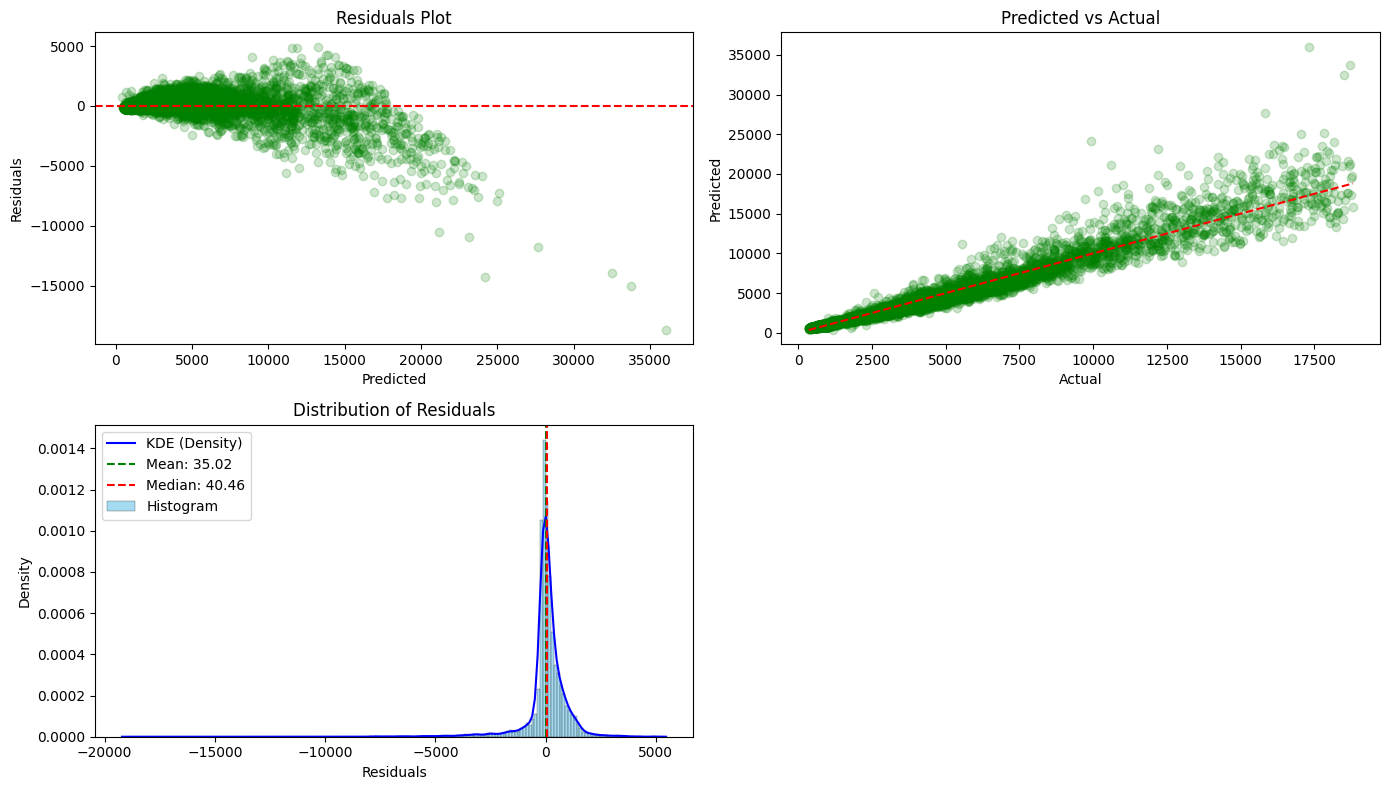

In [88]:
eval.plot_diagnostics()

,feature,importance
0,carat,0.339126
26,carat_x_density,0.323087
21,carat_x_clarity,0.280439
16,carat_x_color,0.255517
11,carat_x_cut,0.223226


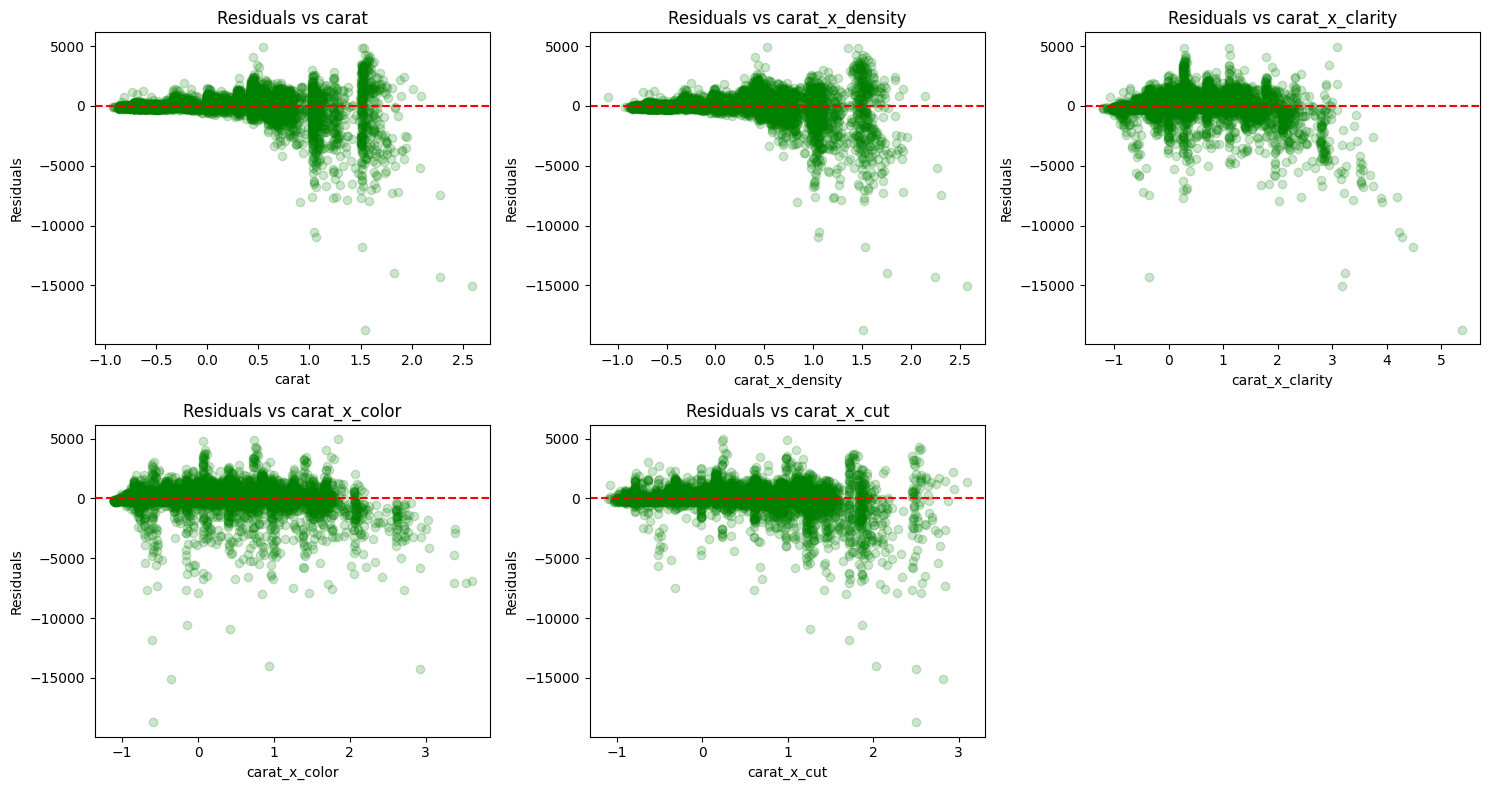

In [89]:
eval.important_features(X)
eval.plot_partial_dependence(X)

### 6.3. Testing

In [90]:
# Robust scaling for X_test 
X_test_scaled = scaler.transform(X_test)

# Add bias
X_test = add_bias(X_test_scaled)

,,RMSE,MAE,WAPE,PRED(0.15),R2
0,train,1069.81,533.53,0.1350,0.6430,0.9289
1,test,1144.06,535.11,0.1363,0.6436,0.9179


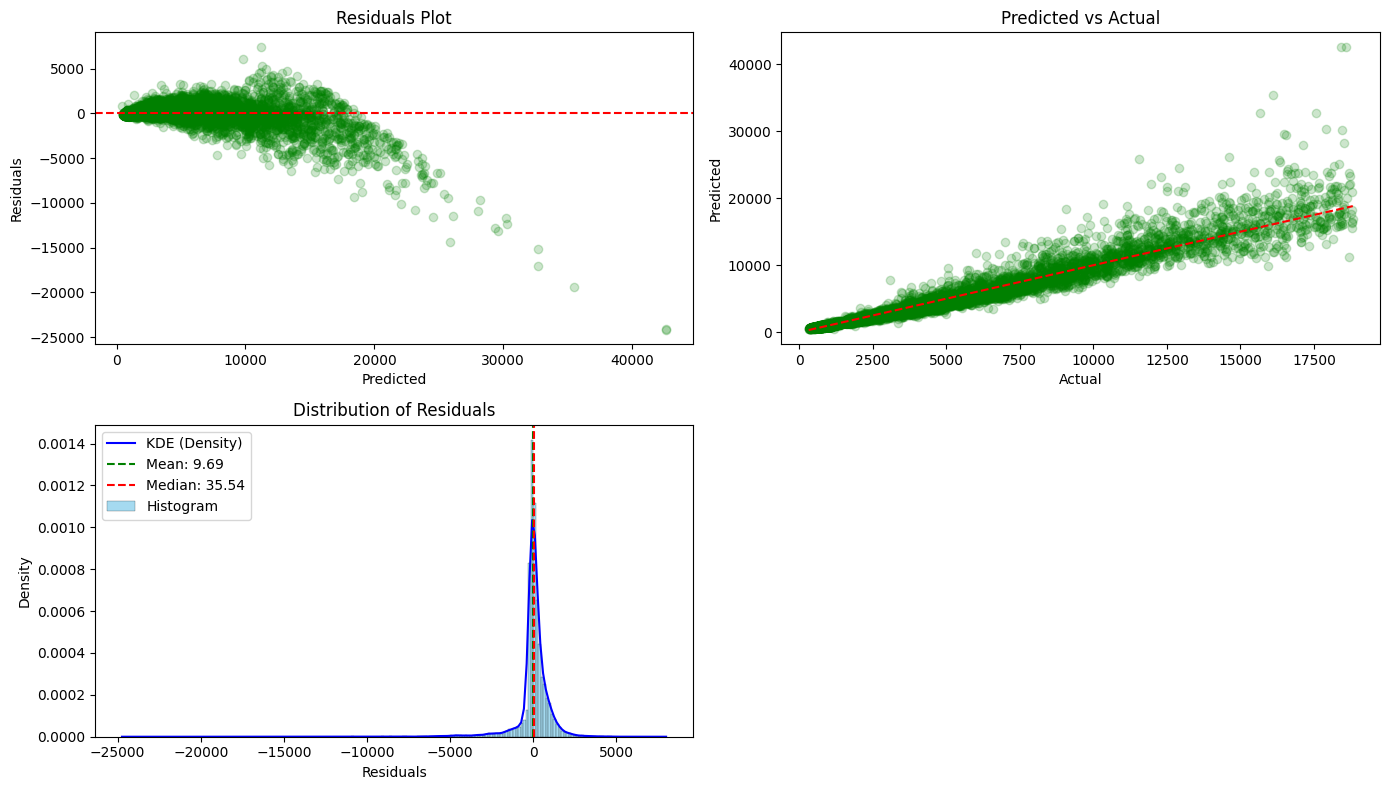

,feature,importance
0,carat,0.339126
26,carat_x_density,0.323087
21,carat_x_clarity,0.280439
16,carat_x_color,0.255517
11,carat_x_cut,0.223226


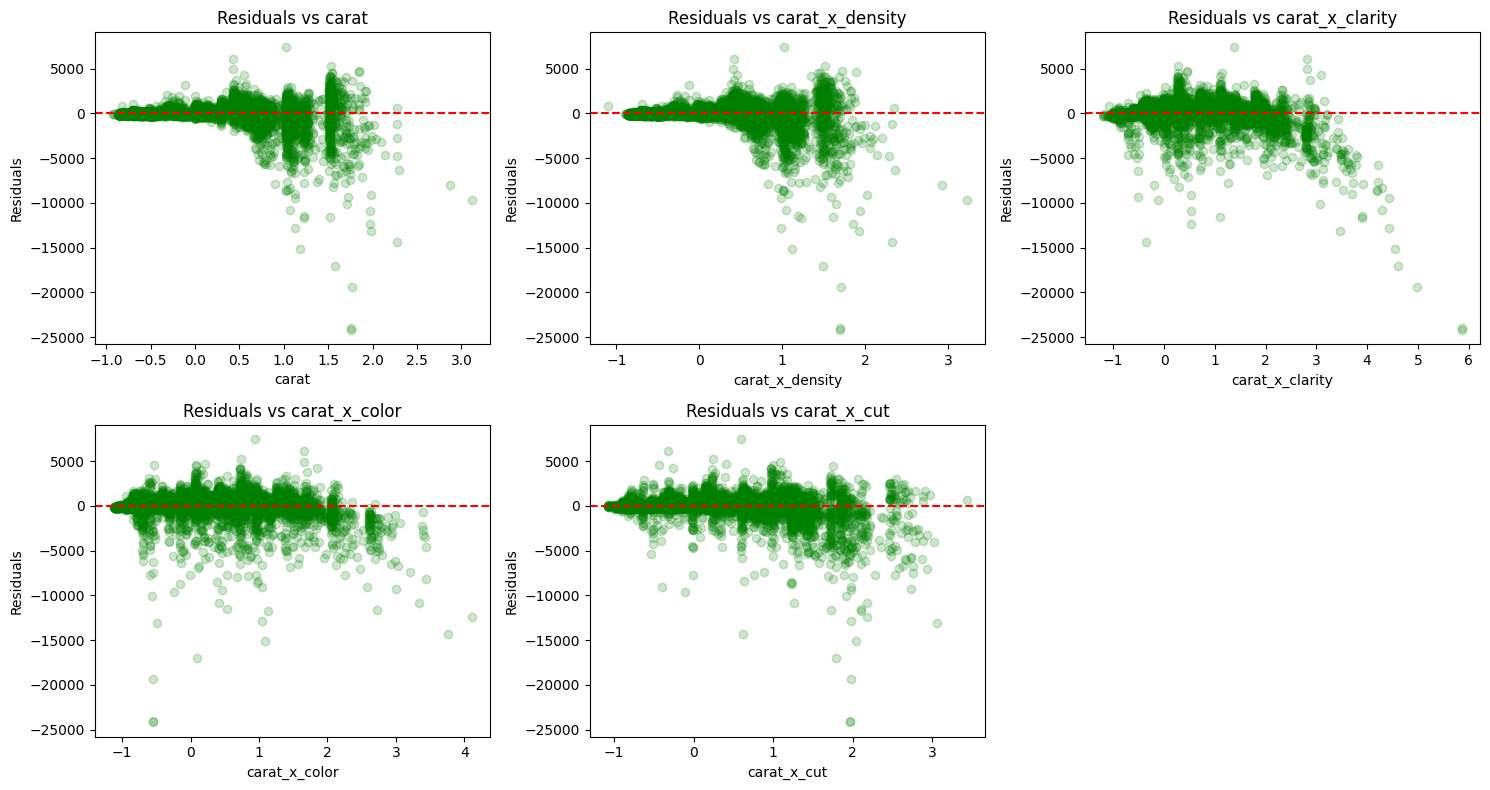

In [92]:
# Testing
eval_test = EvaluateModel(model, X_train, y_train, X_test, y_test, name="test")
eval_test.evaluate_model()
eval_test.plot_diagnostics()
eval_test.important_features(X)
eval_test.plot_partial_dependence(X)